# Projet NLP 3A ENSAE

Auteur : Loïc Thomas


Date : avril 2024

Note : ChatGPT a été utilisé à de nombreuses reprise. En particulier, j'ai laissé les commentaires en anglais qui sont souvent pertinents.

## Importation packages

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
import re

## Extraction des données et premières manipulations

On transforme à l'issue de cette partie les données en une grande liste contenant les lignes brutes du json.

In [2]:
# Load JSON data from file
with open('../data/entities.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [3]:
len(data)

1218

In [4]:
list(data.values())[0]

'ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise\nⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise\nⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise\nⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise\nⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise\nⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise\nⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise\nⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise\nⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise\nⓅde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise\nⓄde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise\nⓄde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise\nⓄde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise\nⓄde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise\nⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise\nⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise\nⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise\nⓅGaucheron ⒻJoachim Florentin Ⓜpharmacien Ⓐ30 ⒸHomme m

In [5]:
def line_to_list(line):
    return(line.split("\n"))

In [6]:
line_to_list(list(data.values())[0])

['ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise',
 'ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise',
 'ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise',
 'ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise',
 'ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise',
 'ⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise',
 'ⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise',
 'Ⓟde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise',
 'Ⓞde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise',
 'Ⓞde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise',
 'Ⓞde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise',
 'Ⓞde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise',
 'ⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise',
 'ⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise',
 'ⓅG

In [7]:
def json_to_big_list(data):
    concatenated_list = []
    for value in data.values():
        if len(value) >= 1:
            concatenated_list.extend(line_to_list(value))
    return concatenated_list

In [8]:
big_list = json_to_big_list(data)

In [9]:
len(big_list)

25081

In [10]:
for i in range(len(big_list)):
    print(big_list[i])

ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise
ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise
ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise
ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise
ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise
ⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise
ⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise
ⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise
ⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise
Ⓟde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise
Ⓞde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise
Ⓞde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise
Ⓞde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise
Ⓞde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise
ⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise
ⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise
ⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise
ⓅGaucheron ⒻJoachim Florentin Ⓜpharmacien Ⓐ30 ⒸHomme marié Ⓚfrançaise
ⓄS

## Transformation de la liste en dataframe

In [11]:
with open("../data/tokens.yml", "r", encoding="utf-8") as f:
    data_token = yaml.safe_load(f)

print(data_token)

{'age': {'start': 'Ⓐ', 'end': ''}, 'birth_date': {'start': 'Ⓑ', 'end': ''}, 'civil_status': {'start': 'Ⓒ', 'end': ''}, 'education_level': {'start': 'Ⓓ', 'end': ''}, 'employer': {'start': 'Ⓔ', 'end': ''}, 'firstname': {'start': 'Ⓕ', 'end': ''}, 'link': {'start': 'Ⓗ', 'end': ''}, 'lob': {'start': 'Ⓘ', 'end': ''}, 'maiden_name': {'start': 'Ⓙ', 'end': ''}, 'nationality': {'start': 'Ⓚ', 'end': ''}, 'observation': {'start': 'Ⓛ', 'end': ''}, 'occupation': {'start': 'Ⓜ', 'end': ''}, 'surname': {'start': 'Ⓞ', 'end': ''}, 'surname_household': {'start': 'Ⓟ', 'end': ''}}


In [12]:
data_category = {
    'age': {'start': 'Ⓐ', 'end': ''},
    'birth_date': {'start': 'Ⓑ', 'end': ''},
    'civil_status': {'start': 'Ⓒ', 'end': ''},
    'education_level': {'start': 'Ⓓ', 'end': ''},
    'employer': {'start': 'Ⓔ', 'end': ''},
    'firstname': {'start': 'Ⓕ', 'end': ''},
    'link': {'start': 'Ⓗ', 'end': ''},
    'lob': {'start': 'Ⓘ', 'end': ''},
    'maiden_name': {'start': 'Ⓙ', 'end': ''},
    'nationality': {'start': 'Ⓚ', 'end': ''},
    'observation': {'start': 'Ⓛ', 'end': ''},
    'occupation': {'start': 'Ⓜ', 'end': ''},
    'surname': {'start': 'Ⓞ', 'end': ''},
    'surname_household': {'start': 'Ⓟ', 'end': ''}
}

# Convert dictionary to DataFrame
df_category = pd.DataFrame(data_category)

In [13]:
[df_category.iat[0,i] for i in range(len(df_category.columns))]

['Ⓐ', 'Ⓑ', 'Ⓒ', 'Ⓓ', 'Ⓔ', 'Ⓕ', 'Ⓗ', 'Ⓘ', 'Ⓙ', 'Ⓚ', 'Ⓛ', 'Ⓜ', 'Ⓞ', 'Ⓟ']

In [14]:
def split_on_letters(string, split_list):
    # Joining the letters in split_list into a regex pattern
    pattern = '|'.join(re.escape(letter) for letter in split_list)
    
    # Splitting the string using the regex pattern
    parts = re.split(pattern, string)
    
    return parts

# Example string
string = "HelloWorld!Howareyou?"

# List of letters to split on
split_list = [df_category.iat[0,i] for i in range(len(df_category.columns))]

# Splitting the string on the letters in split_list
result = split_on_letters(string, split_list)

# Print the result
print(result)

['HelloWorld!Howareyou?']


In [15]:
pd.DataFrame([split_on_letters(line, split_list) for line in big_list])

0                   1            2               3       4  \
0                   Breton      Cyrille       menuisier      25    
1                  Ferazzi      Auguste         vitrier      30    
2                   Machol       Pierre         vitrier      24    
3                  Desbois    Alexandre         prop re      48    
4                   Vignat        Zélie         prop re   sa fe    
...   ..                ...          ...             ...     ...   
25076     Chameton-Dideron        Marie            chef    1869    
25077                  Ode        Marie   ouv chaus res    chef    
25078                Berni        Nello       manoeuvre    chef    
25079        Berni-Laureti   Annunziata          épouse    1887    
25080                Berni        Primo            fils    1914    

                  5            6           7                 8     9  
0           Garçon     française        None              None  None  
1           Garçon   Piémontaise        None              None  None  
2           Garçon   Piémontaise        None              None  None  
3      Homme marié     française        None              None  None  
4               30     française        None              None  None  
...             ...          ...         ...               ...   ...  
25076         idem     Pailharès        None              None  None  
25077         Cara         1863        idem   St Naz en Royans  None  
25078      Baretto         1886   italienne             Castel  None  
25079         idem          idem        None              None  None  
25080         idem          idem        None              None  None  

[25081 rows x 10 columns]

In [16]:
[line for line in big_list]

['ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise',
 'ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise',
 'ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise',
 'ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise',
 'ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise',
 'ⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise',
 'ⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise',
 'Ⓟde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise',
 'Ⓞde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise',
 'Ⓞde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise',
 'Ⓞde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise',
 'Ⓞde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise',
 'ⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise',
 'ⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise',
 'ⓅG

In [17]:
# List of symbols
symbols = ['Ⓐ', 'Ⓑ', 'Ⓒ', 'Ⓓ', 'Ⓔ', 'Ⓕ', 'Ⓗ', 'Ⓘ', 'Ⓙ', 'Ⓚ', 'Ⓛ', 'Ⓜ', 'Ⓞ', 'Ⓟ']

# Example sentences
sentences = ['ⒻHello ⒺWorld', 'ⒻHow are you?']

def clean_spaces(li):
    for i in range(len(li)-1):
        li[i] = str(li[i])[:-1]
    return li

# Function to create DataFrame
def create_dataframe(sentences, symbols):
    data = []

    for sentence in sentences:
        # Initialize a dictionary for the current sentence
        sentence_dict = {symbol: None for symbol in symbols}

        # Split the sentence based on symbols
        list_words = split_on_letters(sentence, split_list)[1:]
        list_words = clean_spaces(list_words)
        list_symbols = [char for char in sentence if char in symbols]
        print(list_words)
        print(list_symbols)

        for i in range(len(list_symbols)):
            sentence_dict[list_symbols[i]] = list_words[i]

        # Append the dictionary to the data list
        data.append(sentence_dict)

    # Create DataFrame
    df = pd.DataFrame(data)

    return df

# Create DataFrame
df_recensement = create_dataframe(big_list, symbols)

# Print DataFrame
df_recensement

['Breton', 'Cyrille', 'menuisier', '25', 'Garçon', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Ferazzi', 'Auguste', 'vitrier', '30', 'Garçon', 'Piémontaise']
['Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Machol', 'Pierre', 'vitrier', '24', 'Garçon', 'Piémontaise']
['Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Desbois', 'Alexandre', 'prop re', '48', 'Homme marié', 'française']
['Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Vignat', 'Zélie', 'prop re', 'sa fe', '30', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓗ', 'Ⓐ', 'Ⓚ']
['Houy', 'Caroline', 'domestique', '24', 'Fille', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Violet', 'Esther', 'fe de chambre', '24', 'Fille', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Desbroper', 'François Jules', 'aumônier du collège', '46', 'Garçon', 'française']
['Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Apelmeau', 'Thérèse', 'domestique', '49', 'Femme mariée', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['de Chaumont', '40', 'Homme marié', 'française']
['Ⓟ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['de Chaumont', 'Mathilde', 'profess', 'sa 

Ⓐ     Ⓑ            Ⓒ     Ⓓ        Ⓔ           Ⓕ       Ⓗ  \
0        25  None       Garçon  None     None     Cyrille    None   
1        30  None       Garçon  None     None     Auguste    None   
2        24  None       Garçon  None     None      Pierre    None   
3        48  None  Homme marié  None     None   Alexandre    None   
4        30  None         None  None     None       Zélie   sa fe   
...     ...   ...          ...   ...      ...         ...     ...   
25076  None  1869         None  None     None       Marie    chef   
25077  None  1863         None  None     Cara       Marie    chef   
25078  None  1886         None  None  Baretto       Nello    chef   
25079  None  1887         None  None     None  Annunziata  épouse   
25080  None  1914         None  None     None       Primo    fils   

                      Ⓘ     Ⓙ            Ⓚ     Ⓛ              Ⓜ  \
0                  None  None    française  None      menuisier   
1                  None  None  Piémontaise  None        vitrier   
2                  None  None  Piémontaise  None        vitrier   
3                  None  None    française  None        prop re   
4                  None  None    française  None        prop re   
...                 ...   ...          ...   ...            ...   
25076         Pailharès  None         idem  None           None   
25077  St Naz en Royans  None         idem  None  ouv chaus res   
25078            Castel  None    italienne  None      manoeuvre   
25079              idem  None         idem  None           None   
25080              idem  None         idem  None           None   

                   Ⓞ                 Ⓟ  
0             Breton              None  
1               None           Ferazzi  
2               None            Machol  
3               None           Desbois  
4             Vignat              None  
...              ...               ...  
25076           None  Chameton-Dideron  
25077           None               Ode  
25078           None             Berni  
25079  Berni-Laureti              None  
25080          Berni              None  

[25081 rows x 14 columns]

In [18]:
data_category.keys()

dict_keys(['age', 'birth_date', 'civil_status', 'education_level', 'employer', 'firstname', 'link', 'lob', 'maiden_name', 'nationality', 'observation', 'occupation', 'surname', 'surname_household'])

In [19]:
df_category

age birth_date civil_status education_level employer firstname link lob  \
start   Ⓐ          Ⓑ            Ⓒ               Ⓓ        Ⓔ         Ⓕ    Ⓗ   Ⓘ   
end                                                                             

      maiden_name nationality observation occupation surname surname_household  
start           Ⓙ           Ⓚ           Ⓛ          Ⓜ       Ⓞ                 Ⓟ  
end

In [20]:
df_recensement

Ⓐ     Ⓑ            Ⓒ     Ⓓ        Ⓔ           Ⓕ       Ⓗ  \
0        25  None       Garçon  None     None     Cyrille    None   
1        30  None       Garçon  None     None     Auguste    None   
2        24  None       Garçon  None     None      Pierre    None   
3        48  None  Homme marié  None     None   Alexandre    None   
4        30  None         None  None     None       Zélie   sa fe   
...     ...   ...          ...   ...      ...         ...     ...   
25076  None  1869         None  None     None       Marie    chef   
25077  None  1863         None  None     Cara       Marie    chef   
25078  None  1886         None  None  Baretto       Nello    chef   
25079  None  1887         None  None     None  Annunziata  épouse   
25080  None  1914         None  None     None       Primo    fils   

                      Ⓘ     Ⓙ            Ⓚ     Ⓛ              Ⓜ  \
0                  None  None    française  None      menuisier   
1                  None  None  Piémontaise  None        vitrier   
2                  None  None  Piémontaise  None        vitrier   
3                  None  None    française  None        prop re   
4                  None  None    française  None        prop re   
...                 ...   ...          ...   ...            ...   
25076         Pailharès  None         idem  None           None   
25077  St Naz en Royans  None         idem  None  ouv chaus res   
25078            Castel  None    italienne  None      manoeuvre   
25079              idem  None         idem  None           None   
25080              idem  None         idem  None           None   

                   Ⓞ                 Ⓟ  
0             Breton              None  
1               None           Ferazzi  
2               None            Machol  
3               None           Desbois  
4             Vignat              None  
...              ...               ...  
25076           None  Chameton-Dideron  
25077           None               Ode  
25078           None             Berni  
25079  Berni-Laureti              None  
25080          Berni              None  

[25081 rows x 14 columns]

In [21]:
dict(zip(df_recensement.columns, data_category.keys()))

{'Ⓐ': 'age',
 'Ⓑ': 'birth_date',
 'Ⓒ': 'civil_status',
 'Ⓓ': 'education_level',
 'Ⓔ': 'employer',
 'Ⓕ': 'firstname',
 'Ⓗ': 'link',
 'Ⓘ': 'lob',
 'Ⓙ': 'maiden_name',
 'Ⓚ': 'nationality',
 'Ⓛ': 'observation',
 'Ⓜ': 'occupation',
 'Ⓞ': 'surname',
 'Ⓟ': 'surname_household'}

In [22]:
df_recensement = df_recensement.rename(columns=dict(zip(df_recensement.columns, data_category.keys())))

#### Remplacement des idems

In [23]:
df_recensement

age birth_date civil_status education_level employer   firstname  \
0        25       None       Garçon            None     None     Cyrille   
1        30       None       Garçon            None     None     Auguste   
2        24       None       Garçon            None     None      Pierre   
3        48       None  Homme marié            None     None   Alexandre   
4        30       None         None            None     None       Zélie   
...     ...        ...          ...             ...      ...         ...   
25076  None       1869         None            None     None       Marie   
25077  None       1863         None            None     Cara       Marie   
25078  None       1886         None            None  Baretto       Nello   
25079  None       1887         None            None     None  Annunziata   
25080  None       1914         None            None     None       Primo   

         link               lob maiden_name  nationality observation  \
0        None              None        None    française        None   
1        None              None        None  Piémontaise        None   
2        None              None        None  Piémontaise        None   
3        None              None        None    française        None   
4       sa fe              None        None    française        None   
...       ...               ...         ...          ...         ...   
25076    chef         Pailharès        None         idem        None   
25077    chef  St Naz en Royans        None         idem        None   
25078    chef            Castel        None    italienne        None   
25079  épouse              idem        None         idem        None   
25080    fils              idem        None         idem        None   

          occupation        surname surname_household  
0          menuisier         Breton              None  
1            vitrier           None           Ferazzi  
2            vitrier           None            Machol  
3            prop re           None           Desbois  
4            prop re         Vignat              None  
...              ...            ...               ...  
25076           None           None  Chameton-Dideron  
25077  ouv chaus res           None               Ode  
25078      manoeuvre           None             Berni  
25079           None  Berni-Laureti              None  
25080           None          Berni              None  

[25081 rows x 14 columns]

In [24]:
for column in df_recensement.columns:
    print(f"Nombre de idem / Idem dans la colonne {column} : {df_recensement[column].value_counts().get('idem', 0)}" +
           f" / {df_recensement[column].value_counts().get('Idem', 0)}")

Nombre de idem / Idem dans la colonne age : 3 / 0
Nombre de idem / Idem dans la colonne birth_date : 1 / 0
Nombre de idem / Idem dans la colonne civil_status : 0 / 0
Nombre de idem / Idem dans la colonne education_level : 0 / 0
Nombre de idem / Idem dans la colonne employer : 605 / 1
Nombre de idem / Idem dans la colonne firstname : 16 / 0
Nombre de idem / Idem dans la colonne link : 2138 / 3
Nombre de idem / Idem dans la colonne lob : 3378 / 13
Nombre de idem / Idem dans la colonne maiden_name : 0 / 0
Nombre de idem / Idem dans la colonne nationality : 4449 / 5
Nombre de idem / Idem dans la colonne observation : 88 / 0
Nombre de idem / Idem dans la colonne occupation : 3695 / 0
Nombre de idem / Idem dans la colonne surname : 669 / 5
Nombre de idem / Idem dans la colonne surname_household : 4 / 0


In [25]:
df_recensement.isnull().sum()

age                   8645
birth_date           17737
civil_status         14376
education_level      25081
employer             22170
firstname              150
link                  4345
lob                  15845
maiden_name          25081
nationality          11767
observation          24479
occupation            8902
surname               5922
surname_household    19441
dtype: int64

Le remplacement en tant que tel :

In [26]:
df_recensement.fillna("should_be_None", inplace=True)
df_recensement.replace('idem', None, inplace=True)
df_recensement.replace('Idem', None, inplace=True)
df_recensement.fillna(method='ffill', inplace=True)
df_recensement.replace("should_be_None", None, inplace=True)

C:\Users\Serv3\AppData\Local\Temp\ipykernel_14276\59354610.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_recensement.fillna(method='ffill', inplace=True)


On vérifie ensuite que ça s'est bien passé.

In [27]:
for column in df_recensement.columns:
    print(f"Nombre de idem / Idem dans la colonne {column} : {df_recensement[column].value_counts().get('idem', 0)}" +
           f" / {df_recensement[column].value_counts().get('Idem', 0)}")

Nombre de idem / Idem dans la colonne age : 0 / 0
Nombre de idem / Idem dans la colonne birth_date : 0 / 0
Nombre de idem / Idem dans la colonne civil_status : 0 / 0
Nombre de idem / Idem dans la colonne education_level : 0 / 0
Nombre de idem / Idem dans la colonne employer : 0 / 0
Nombre de idem / Idem dans la colonne firstname : 0 / 0
Nombre de idem / Idem dans la colonne link : 0 / 0
Nombre de idem / Idem dans la colonne lob : 0 / 0
Nombre de idem / Idem dans la colonne maiden_name : 0 / 0
Nombre de idem / Idem dans la colonne nationality : 0 / 0
Nombre de idem / Idem dans la colonne observation : 0 / 0
Nombre de idem / Idem dans la colonne occupation : 0 / 0
Nombre de idem / Idem dans la colonne surname : 0 / 0
Nombre de idem / Idem dans la colonne surname_household : 0 / 0


In [28]:
df_recensement

age birth_date civil_status education_level employer   firstname  \
0        25       None       Garçon            None     None     Cyrille   
1        30       None       Garçon            None     None     Auguste   
2        24       None       Garçon            None     None      Pierre   
3        48       None  Homme marié            None     None   Alexandre   
4        30       None         None            None     None       Zélie   
...     ...        ...          ...             ...      ...         ...   
25076  None       1869         None            None     None       Marie   
25077  None       1863         None            None     Cara       Marie   
25078  None       1886         None            None  Baretto       Nello   
25079  None       1887         None            None     None  Annunziata   
25080  None       1914         None            None     None       Primo   

         link               lob maiden_name  nationality observation  \
0        None              None        None    française        None   
1        None              None        None  Piémontaise        None   
2        None              None        None  Piémontaise        None   
3        None              None        None    française        None   
4       sa fe              None        None    française        None   
...       ...               ...         ...          ...         ...   
25076    chef         Pailharès        None    française        None   
25077    chef  St Naz en Royans        None    française        None   
25078    chef            Castel        None    italienne        None   
25079  épouse            Castel        None    italienne        None   
25080    fils            Castel        None    italienne        None   

          occupation        surname surname_household  
0          menuisier         Breton              None  
1            vitrier           None           Ferazzi  
2            vitrier           None            Machol  
3            prop re           None           Desbois  
4            prop re         Vignat              None  
...              ...            ...               ...  
25076           None           None  Chameton-Dideron  
25077  ouv chaus res           None               Ode  
25078      manoeuvre           None             Berni  
25079           None  Berni-Laureti              None  
25080           None          Berni              None  

[25081 rows x 14 columns]

In [29]:
df_recensement.isnull().sum()

age                   8645
birth_date           17737
civil_status         14376
education_level      25081
employer             22227
firstname              150
link                  4389
lob                  16014
maiden_name          25081
nationality          12195
observation          24488
occupation            9094
surname               6107
surname_household    19445
dtype: int64

#### Elimination des lignes avec link vide

In [30]:
df_recensement.isnull().sum()

age                   8645
birth_date           17737
civil_status         14376
education_level      25081
employer             22227
firstname              150
link                  4389
lob                  16014
maiden_name          25081
nationality          12195
observation          24488
occupation            9094
surname               6107
surname_household    19445
dtype: int64

In [31]:
colonne_a_traiter = 'link'
df_recensement = df_recensement.dropna(subset=[colonne_a_traiter])

In [32]:
df_recensement.isnull().sum()

age                   7699
birth_date           13556
civil_status         13977
education_level      20692
employer             17921
firstname               66
link                     0
lob                  12152
maiden_name          20692
nationality           8407
observation          20302
occupation            7898
surname               4509
surname_household    16589
dtype: int64

In [33]:
df_recensement.count()

age                  12993
birth_date            7136
civil_status          6715
education_level          0
employer              2771
firstname            20626
link                 20692
lob                   8540
maiden_name              0
nationality          12285
observation            390
occupation           12794
surname              16183
surname_household     4103
dtype: int64

#### Drop les colonnes qui sont entièrement vides ou quasiment

In [34]:
columns_to_drop = ["education_level", "maiden_name", "observation"]
df_recensement = df_recensement.drop(columns=columns_to_drop)

In [35]:
df_recensement.count()

age                  12993
birth_date            7136
civil_status          6715
employer              2771
firstname            20626
link                 20692
lob                   8540
nationality          12285
occupation           12794
surname              16183
surname_household     4103
dtype: int64

In [36]:
df_recensement.to_csv("../data_cleaned/df_recensement.csv")

## Transformation des champs textuels

#### Création valeur target 0 / 1

In [37]:
array_chief_name = df_recensement[(df_recensement['link'].str.lower().str.contains('chef') 
                & ~df_recensement['link'].str.lower().str.contains('fille')
                & ~df_recensement['link'].str.lower().str.contains('mère')
                & ~df_recensement['link'].str.lower().str.contains('père')
                & ~df_recensement['link'].str.lower().str.contains('fils')
                & ~df_recensement['link'].str.lower().str.contains('sœur')
                & ~df_recensement['link'].str.lower().str.contains('frère')
                & ~df_recensement['link'].str.lower().str.contains('gendre')
                & ~df_recensement['link'].str.lower().str.contains('soeur')
                & ~df_recensement['link'].str.lower().str.contains('oncle')
                & ~df_recensement['link'].str.lower().str.contains('nièce')
                & ~df_recensement['link'].str.lower().str.contains('femme')
                & ~df_recensement['link'].str.lower().str.contains('parent')
                & ~df_recensement['link'].str.lower().str.contains('neveu')
                & ~df_recensement['link'].str.lower().str.contains('mére')
                & ~df_recensement['link'].str.lower().str.contains('fem')
                & ~df_recensement['link'].str.lower().str.contains('domestique')
                & ~df_recensement['link'].str.lower().str.contains('née')
                & ~df_recensement['link'].str.lower().str.contains('pension')
                & ~df_recensement['link'].str.lower().str.contains('adjointe')
                & ~df_recensement['link'].str.lower().str.contains('épouse')
                & ~df_recensement['link'].str.lower().str.contains('tante')
                )]["link"].unique()

In [38]:
array_chief_name

array(['chef', 'Chef de ménage', 'chef de ménage', 'chef du ménage',
       'chef de famille', 'chef de mge', 'chef de flle', 'chef de maison',
       'chef ménage', 'Chef', 'chef de m', 'chef de m.', 'chef m ge',
       'chef veuf', 'chef de mén', 'chef de fam',
       'chef de ménage et veuve', 'Chef de menage', 'chef de mén.',
       'chef de f le', 'chef de mé', 'veuve Corte chef de ménage',
       'veuve Gorer chef de ménage', 'veuve meunier chef de ménage',
       'veuve Bouillet chef de ménage', 'f du chef', 'chef de f',
       'chef de m ge', 'chef de m e', 'chef d m', 'chef religieuse',
       'chef de mé age', 'chef de mange', 'célibataire chef de ménage',
       'Chef de mén', 'journalier chef de menage',
       'cultivateur chef de menage', 'cultivateur chef de ménage',
       'propriétaire et chef de ménage', 'chef de poste',
       'CHEF DE MENAGE', 'chef de méange', 'chef de m⁇nage'], dtype=object)

In [39]:
list_chief_name = list(array_chief_name)

df_recensement["target"] = df_recensement["link"].apply(lambda x: 1 if x in list_chief_name else 0)

In [40]:
df_recensement["target"].sum()

4637

On veut prédire le fait d'être le chef de famille (variable binaire) à partir des autres champs.

In [41]:
df_recensement.nunique()

age                   242
birth_date            150
civil_status            6
employer             1046
firstname            2125
link                  935
lob                  2786
nationality            61
occupation           1558
surname              7078
surname_household    3107
target                  2
dtype: int64

#### Equilibrage du dataframe

In [42]:
print(f"Nombre de chef de famille : {df_recensement["target"].sum()}")
print(f"Nombre total de personnes : {len(df_recensement["target"])}")

Nombre de chef de famille : 4637
Nombre total de personnes : 20692


In [43]:
column_name = 'target'
num_rows_to_remove = len(df_recensement["target"]) - 2*df_recensement["target"].sum()

# Filter rows where column contains 0
zero_rows = df_recensement[df_recensement[column_name] == 0]

# Randomly select rows to remove
rows_to_remove = zero_rows.sample(n=num_rows_to_remove).index

# Remove selected rows
df_recensement = df_recensement.drop(rows_to_remove)

df_recensement.reset_index(inplace=True)

In [44]:
print(f"Nombre de chef de famille : {df_recensement["target"].sum()}")
print(f"Nombre total de personnes : {len(df_recensement["target"])}")

Nombre de chef de famille : 4637
Nombre total de personnes : 9274


In [45]:
df_recensement.head()

index   age birth_date  civil_status employer firstname      link  \
0     10    30       None  Femme mariée     None  Mathilde     sa fe   
1     13     5       None        Garçon     None    Gaston   le fils   
2     16    45       None  Femme mariée     None     Adèle  sa femme   
3     31    22       None  Femme mariée     None  Honorine     sa fe   
4     35  None       1905          None     None    Andrée    enfant   

                    lob nationality occupation      surname surname_household  \
0                  None   française    profess  de Chaumont              None   
1                  None   française       None  de Chaumont              None   
2                  None   française   ouvrière     Dutertre              None   
3                  None   française  s. profes     Gauthier              None   
4  St Eloy de Gy - Cher   française      néant       Devaux              None   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

#### Transformation de la colonne nom en une valeur quantitative

In [46]:
firstname_with_sex = pd.read_csv("../data/firstname_with_sex.csv", sep=";")

In [47]:
firstname_with_sex

firstname     male   female
0        marie    10145  2390322
1         jean  1869615     6476
2       pierre  1475841     5047
3       jeanne     1765  1097397
4     françois  1089009     5951
...        ...      ...      ...
6941   winnocq       10        0
6942     xyste        9        1
6943      zara        0       10
6944  zéraphin       10        0
6945     zimle        0       10

[6946 rows x 3 columns]

In [48]:
def from_name_to_value(x):
    if x is None or len(x) == 0:
        return 0
    else:
        x_first_lowcase = x.split()[0].lower()
        if firstname_with_sex[firstname_with_sex["firstname"] == x_first_lowcase].empty:
            return 0
        else:
            return np.arcsin((firstname_with_sex.loc[firstname_with_sex["firstname"] == x_first_lowcase, "male"].iloc[0] 
        - firstname_with_sex.loc[firstname_with_sex["firstname"] == x_first_lowcase, "female"].iloc[0]) /
        (firstname_with_sex.loc[firstname_with_sex["firstname"] == x_first_lowcase, "male"].iloc[0] 
        + firstname_with_sex.loc[firstname_with_sex["firstname"] == x_first_lowcase, "female"].iloc[0])
        ) * 2 / np.pi
        #J'utilise ici arcsin pour éclater mes valeurs qui sont très proches de -1 et 1 pour mieux voir ce qui se passe
        #probablement mieux aussi pour certains modèles

df_recensement["value_name"] = df_recensement["firstname"].apply(from_name_to_value)

In [49]:
df_recensement["value_name"].describe()

count    9274.000000
mean        0.141133
std         0.893493
min        -1.000000
25%        -0.925984
50%         0.900673
75%         0.923441
max         1.000000
Name: value_name, dtype: float64

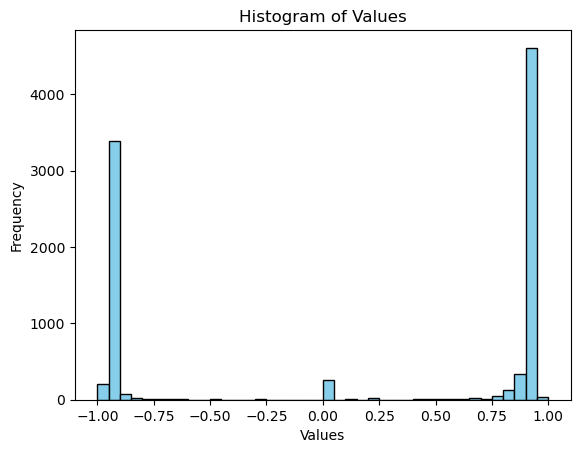

In [50]:
df_recensement["value_name"]

plt.hist(df_recensement["value_name"], bins=40, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

# Show plot
plt.show()

In [51]:
df_recensement.head()

index   age birth_date  civil_status employer firstname      link  \
0     10    30       None  Femme mariée     None  Mathilde     sa fe   
1     13     5       None        Garçon     None    Gaston   le fils   
2     16    45       None  Femme mariée     None     Adèle  sa femme   
3     31    22       None  Femme mariée     None  Honorine     sa fe   
4     35  None       1905          None     None    Andrée    enfant   

                    lob nationality occupation      surname surname_household  \
0                  None   française    profess  de Chaumont              None   
1                  None   française       None  de Chaumont              None   
2                  None   française   ouvrière     Dutertre              None   
3                  None   française  s. profes     Gauthier              None   
4  St Eloy de Gy - Cher   française      néant       Devaux              None   

   target  value_name  
0       0   -0.939087  
1       0    0.922269  
2       0   -0.943760  
3       0   -0.941599  
4       0   -0.919419

#### Transformation de la variable civil_status en variables catégorielles

In [52]:
df_recensement["civil_status"].unique()

array(['Femme mariée', 'Garçon', None, 'Fille', 'Homme marié', 'Veuf',
       'Veuve'], dtype=object)

In [53]:
def sex_from_civil_status(x):
    if x is None:
        return 0
    elif x == "Garçon" or x == "Homme marié" or x == "Veuf":
        return 1
    else:
        return -1

df_recensement["sex_from_civil_status"] = df_recensement["civil_status"].apply(sex_from_civil_status)

In [54]:
df_recensement.groupby("sex_from_civil_status").count()

index   age  birth_date  civil_status  employer  \
sex_from_civil_status                                                    
-1                      1183  1096           6          1183         1   
 0                      6783  3249        3494             0      1772   
 1                      1308  1250           3          1308         2   

                       firstname  link   lob  nationality  occupation  \
sex_from_civil_status                                                   
-1                          1175  1183   223          174         194   
 0                          6766  6783  3553         5572        5922   
 1                          1297  1308   313          237         768   

                       surname  surname_household  target  value_name  
sex_from_civil_status                                                  
-1                        1095                 82    1183        1183  
 0                        3423               3243    6783        6783  
 1                         717                586    1308        1308

In [55]:
df_recensement["widow_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Veuve" else 0)

In [56]:
df_recensement["widower_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Veuf" else 0)

In [57]:
df_recensement["married_man_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Homme marié" else 0)

In [58]:
df_recensement["girl_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Fille" else 0)

In [59]:
df_recensement["boy_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Garçon" else 0)

In [60]:
df_recensement["married_woman_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Femme mariée" else 0)

#### Transformation Occupation en variable catégorielle

In [61]:
df_recensement.isnull().sum()

index                        0
age                       3679
birth_date                5771
civil_status              6783
employer                  7499
firstname                   36
link                         0
lob                       5185
nationality               3291
occupation                2390
surname                   4039
surname_household         5363
target                       0
value_name                   0
sex_from_civil_status        0
widow_encoding               0
widower_encoding             0
married_man_encoding         0
girl_encoding                0
boy_encoding                 0
married_woman_encoding       0
dtype: int64

In [62]:
value_counts = df_recensement['occupation'].value_counts().reset_index().rename(columns={'index': 'occupation', 'Column': 'Count'})

from IPython.display import display
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    display(value_counts.sort_values(by='count', ascending=False).head(100)) #need display to show the dataframe when using with in jupyter
    #some pandas stuff

occupation  count
0                cultivateur    758
1                      néant    492
2                 journalier    246
3                         sp    204
4                        s.p    191
5                       cult    184
6            sans profession    141
7                   ménagère    102
8                     cult r     93
9                journalière     85
10                   fermier     80
11                      sans     79
12                couturière     74
13                domestique     71
14              propriétaire     67
15                 menuisier     67
16                     maçon     62
17              cultivatrice     59
18                   employé     57
19                   métayer     57
20                       s p     54
21                  vigneron     54
22                 jardinier     52
23                     cult.     45
24                      s.p.     41
25                  rentière     37
26                  cultivat     36
27               charpentier     35
28                mécanicien     34
29                cordonnier     34
30               Cultivateur     32
31               dentellière     32
32                 prop cult     31
34                     marin     30
33                  retraité     30
35                    mineur     27
36                  sabotier     26
37                    cultiv     26
38                   meunier     26
39                 boulanger     26
40                 tisserand     25
41                   rentier     25
42                     cultr     24
43                   épicier     24
46                   lingère     23
44       cultivateur fermier     23
45                cantonnier     23
48                 chauffeur     22
49                  forgeron     22
47                sans prof.     22
50                   charron     21
51                 manoeuvre     20
52                         n     19
53                   ouvrier     19
54                 comptable     19
55              institutrice     18
56                 sans prof     18
59                aubergiste     17
60           prop exploitant     17
57                       cul     17
58                  ouvrière     17
61          ouvrier agricole     16
62                   prop re     16
63                   cultiv.     16
64                propr cult     15
65                   boucher     15
66  propriétaire cultivateur     15
69                Journalier     14
70                      ppre     14
67                  couvreur     14
68               instituteur     14
72                  Vigneron     13
71                  marinier     13
73                 serrurier     12
74                  cult eur     12
75              s profession     12
76                 cult ferm     12
77                charretier     12
82           ouvrier d'usine     11
84            Pre exploitant     11
83                  maréchal     11
79           même profession     11
81                     journ     11
80                cuisinière     11
78                   tisseur     11
89                 négociant     10
93                commerçant     10
92             propr exploit     10
91          prop cultivateur     10
90                  tailleur     10
87         pr re cultivateur     10
86                   cultivr     10
85                 tonnelier     10
88                  épicière     10
94                  servante      9
95                      p re      9
96                     cultv      9
97                 coutelier      9
98                  manœuvre      9
99         tailleur d'habits      9

In [63]:
list_no_occupation = ["sans", "sans profession", "néant", "sp", "s.p.", "s.p", 
                    "s p", 'sans prof.', "sans prof", "s profession"
                    ]

df_recensement["has_no_occupation"] = df_recensement["occupation"].apply(
    lambda x:1 if x is None or (x.lower() in list_no_occupation) else 0)

In [64]:
list_farmer_job = ["cultivateur", "cult", "cult idem", "ouvrier agricole", "journalier", "fermier",
                 "propriétaire", "vigneron", "cultivateur fermier", "prop cult", "pre exploitant", 
                 "cultr", "cult eur", "cultivr", "prop exploitant", "journ", "cult ferm", "propr cult",
                 "p re", "cul.", "p exploitant", "prop re"
                     	]

df_recensement["is_farmer"] = df_recensement["occupation"].apply(
    lambda x:1 if x != None and (x.lower() in list_farmer_job
                                 ) else 0)

In [65]:
list_male_job = ["cultivateur", "cult", "cult idem", "ouvrier agricole", "journalier", "fermier",
                 "menuisier", "employé", "maçon", "jardinier", "métayer", "mécanicien", "propriétaire",
                 "retraité", "vigneron", "meunier", "manoeuvre", "charpentier", "mineur", "boulanger",
                 "cordonnier", "rentier", "cantonnier", "sabotier", "chauffeur", "marin", "comptable",
                 "charon", "épicier", "tisserand", "boucher", "cultivateur fermier", "aubergiste",
                 "ouvrier d'usine", "prop cult", "pre exploitant", "cultr", "cult eur", "cultivr", "tisseur", 
                 "électricien", "serrurier", "prop exploitant", "peintre", "charretier", "forgeron",
                 "tonnelier", "journ", "cult ferm", "propr cult", "tailleur", "p re", "ouvrier",
                 "couvreur", "négociant", "manœuvre", "commerçant", "chapelier", "instituteur", 
                 "limonadier", "tailleur d'habits", "cul.", "p exploitant", "prop re", "cocher", "ferblantier"
                     	]

df_recensement["has_male_job"] = df_recensement["occupation"].apply(
    lambda x:1 if x != None and (x.lower() in list_male_job) else 0)

#### Imputation de age par la moyenne

In [66]:
df_recensement['age'].describe()

count     5595
unique     175
top         30
freq       135
Name: age, dtype: object

In [67]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    display(df_recensement["age"].head(100)) #need display to show the dataframe when using with in jupyter
    #some pandas stuff

0          30
1           5
2          45
3          22
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       1867
29       None
30       None
31       None
32       None
33       None
34       None
35       None
36       None
37       None
38       None
39       None
40          2
41          6
42          2
43          4
44          2
45         11
46         30
47         68
48         37
49         38
50         73
51         31
52         48
53         36
54          9
55         25
56         48
57         39
58         16
59          1
60          7
61         52
62         23
63         18
64         13
65          5
66       None
67       None
68       None
69       None
70       None
71    

In [68]:
def convert_to_int_or_none(value):
    if value is None:
        return None
    try:
        return int(value)
    except ValueError:
        return None

# Apply the function to the column
df_recensement['age'] = df_recensement['age'].apply(convert_to_int_or_none)

# Define the range
lower_bound = 0
upper_bound = 110

# Replace values outside the range with NaN
df_recensement['age'] = df_recensement['age'].apply(lambda x: x if lower_bound <= x <= upper_bound else None)

In [69]:
df_recensement['age'].describe()

count    5440.000000
mean       36.724449
std        21.027084
min         1.000000
25%        19.000000
50%        37.000000
75%        53.000000
max        98.000000
Name: age, dtype: float64

In [70]:
# To keep track of the None values
df_recensement['age_is_None'] = df_recensement['age'].apply(lambda x: 1 if x is None else 0)

In [71]:
# On met l'imputation à la limite entre chef et non chef visualisé plus bas (25 ans)

imputation_value = 25
df_recensement['age_value'] = df_recensement['age'].fillna(imputation_value)

#### Visualisation de nos variables explicatives par rapport au target

In [72]:
df_recensement.columns

Index(['index', 'age', 'birth_date', 'civil_status', 'employer', 'firstname',
       'link', 'lob', 'nationality', 'occupation', 'surname',
       'surname_household', 'target', 'value_name', 'sex_from_civil_status',
       'widow_encoding', 'widower_encoding', 'married_man_encoding',
       'girl_encoding', 'boy_encoding', 'married_woman_encoding',
       'has_no_occupation', 'is_farmer', 'has_male_job', 'age_is_None',
       'age_value'],
      dtype='object')

C:\Users\Serv3\AppData\Local\Temp\ipykernel_14276\4225448537.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["target_blurred"] = df_sub["target"] + np.random.uniform(low=-0.45, high=0.45, size=len(df_sub['target']))


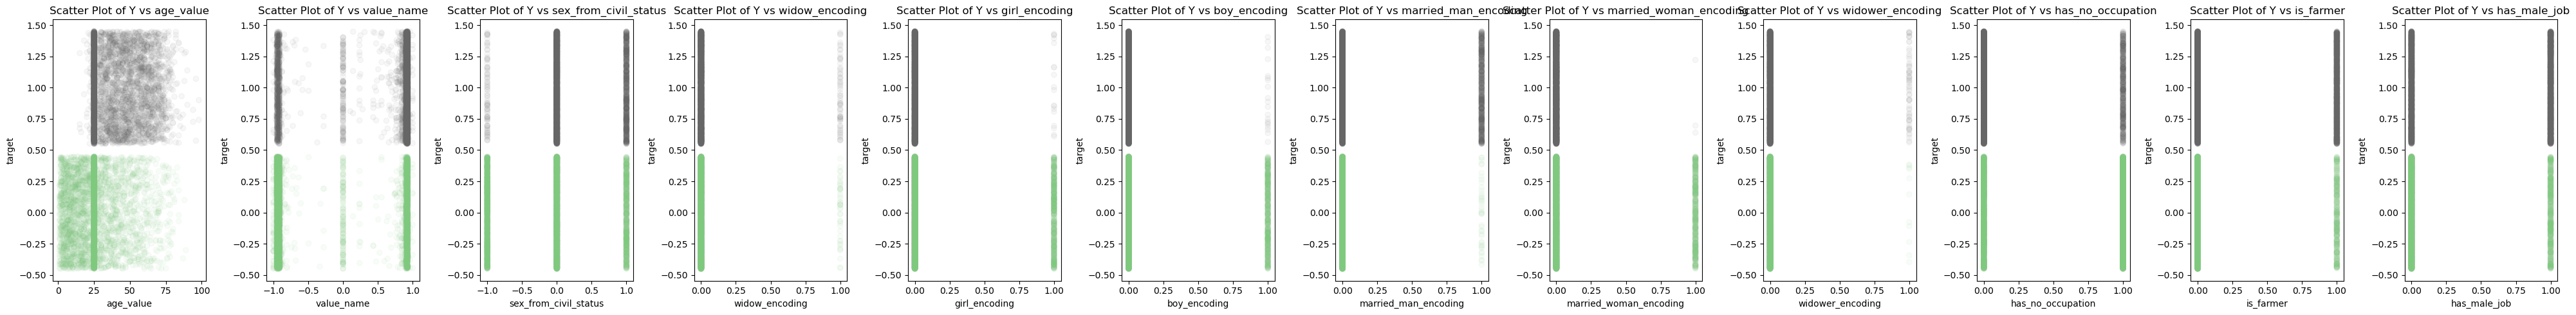

In [73]:
df_sub = df_recensement[["age_value", "value_name", "sex_from_civil_status", 
                         "widow_encoding", "girl_encoding", "boy_encoding", "married_man_encoding", 
                         "married_woman_encoding", "widower_encoding",
                         "has_no_occupation", "is_farmer", "has_male_job", 
                         "target"]]

# J'écarte ici les valeurs de l'indicatrice "être un chef de famille" afin de mieux voir les graphes
df_sub["target_blurred"] = df_sub["target"] + np.random.uniform(low=-0.45, high=0.45, size=len(df_sub['target']))

fig, axes = plt.subplots(nrows=1, ncols=len(df_sub.columns) - 2, figsize=(3 * len(df_sub.columns) - 2, 5))

# Iterate over each column
for i, column in enumerate(df_sub.columns[:-2]):  # Exclude the last column 'Y'
    # Filter out rows with NaN values in the current column
    filtered_df = df_sub.dropna(subset=[column])
    
    # Create scatter plot for current column against 'Y'
    axes[i].scatter(filtered_df[column], filtered_df["target_blurred"], c=filtered_df['target'], cmap='Accent', alpha=0.05)
    
    # Set title for each subplot
    axes[i].set_title('Scatter Plot of Y vs {}'.format(column))
    
    # Set labels for each subplot
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('target')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

C:\Users\Serv3\AppData\Local\Temp\ipykernel_14276\2653249616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["target_blurred"] = df_sub["target"] + np.random.uniform(low=-0.45, high=0.45, size=len(df_sub['target']))


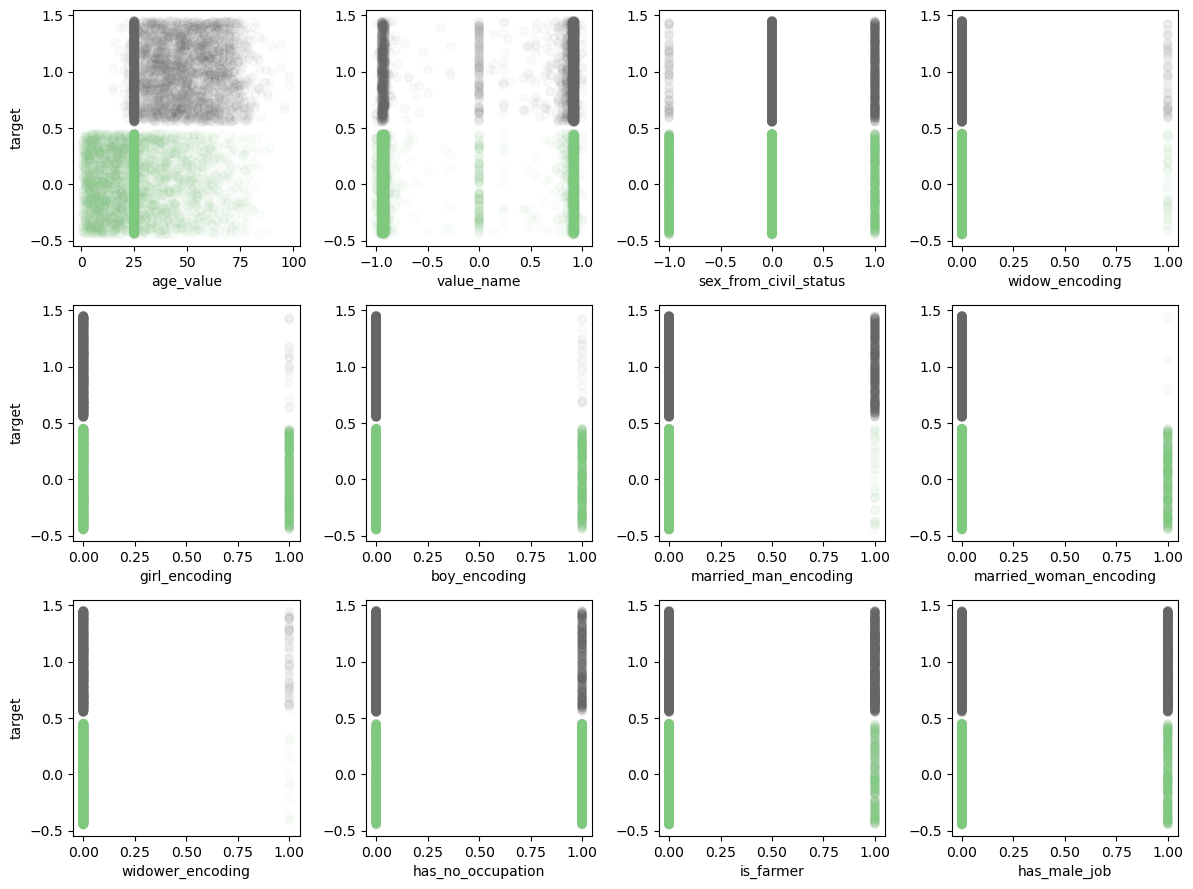

In [74]:
# J'écarte ici les valeurs de l'indicatrice "être un chef de famille" afin de mieux voir les graphes
df_sub["target_blurred"] = df_sub["target"] + np.random.uniform(low=-0.45, high=0.45, size=len(df_sub['target']))

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))  # 3 rows, 4 columns

# Iterate over each column
for i, column in enumerate(df_sub.columns[:-2]):  # Exclude the last column 'Y'
    # Calculate the row and column index for the subplot
    row_index = i // 4  # Integer division to get the row index
    col_index = i % 4   # Modulus operator to get the column index
    
    # Filter out rows with NaN values in the current column
    filtered_df = df_sub.dropna(subset=[column])
    
    # Create scatter plot for current column against 'Y'
    axes[row_index, col_index].scatter(filtered_df[column], filtered_df["target_blurred"], c=filtered_df['target'], cmap='Accent', alpha=0.03)
    
    # Set title for each subplot
    #axes[row_index, col_index].set_title('Scatter Plot of Y vs {}'.format(column))
    
    # Set labels for each subplot
    axes[row_index, col_index].set_xlabel(column)
    if col_index == 0:
        axes[row_index, col_index].set_ylabel('target')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [75]:
df_recensement.columns

Index(['index', 'age', 'birth_date', 'civil_status', 'employer', 'firstname',
       'link', 'lob', 'nationality', 'occupation', 'surname',
       'surname_household', 'target', 'value_name', 'sex_from_civil_status',
       'widow_encoding', 'widower_encoding', 'married_man_encoding',
       'girl_encoding', 'boy_encoding', 'married_woman_encoding',
       'has_no_occupation', 'is_farmer', 'has_male_job', 'age_is_None',
       'age_value'],
      dtype='object')

In [76]:
columns_to_drop = ['age', 'index', 'birth_date', 'civil_status', 'employer', 'firstname',
       'link', 'lob', 'nationality', 'occupation', 'surname',
       'surname_household']

df_modelisation = df_recensement.drop(columns=columns_to_drop)

In [77]:
df_modelisation.isnull().sum()

target                    0
value_name                0
sex_from_civil_status     0
widow_encoding            0
widower_encoding          0
married_man_encoding      0
girl_encoding             0
boy_encoding              0
married_woman_encoding    0
has_no_occupation         0
is_farmer                 0
has_male_job              0
age_is_None               0
age_value                 0
dtype: int64

## Modélisation

#### Importation

In [78]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import GridSearchCV

#### Splitting of the data

In [79]:
X = df_modelisation.drop('target', axis=1)  # Features
y = df_modelisation['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### First modelisation

In [80]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', GradientBoostingClassifier())
])

In [81]:
# Effectuer une validation croisée sur le pipeline
scores = cross_val_score(pipeline, X_train, y_train, cv=3)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.85200162 0.85038415 0.84350991]


In [82]:
# Entraîner le modèle sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = pipeline.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.861455525606469


In [83]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[809 114]
 [143 789]]


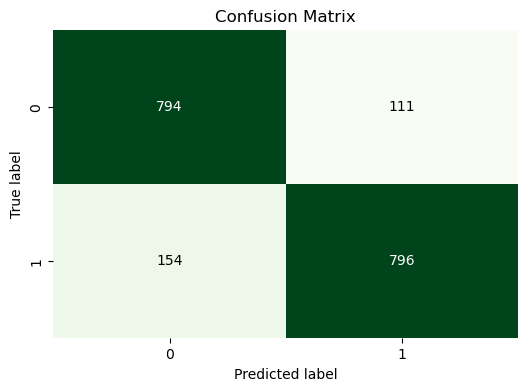

In [84]:
import seaborn as sns

conf_matrix = np.array([[794, 111], [154, 796]])

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Greens', cbar=False)  # cbar=False removes the color bar
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Loop through each cell to add numbers directly
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i == j:
            plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='white')
        else:
            plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black')

plt.show()

#### Comparaison des modèles

In [85]:
models = [("knn", KNeighborsClassifier())]
grids = {"knn" : {'knn__n_neighbors': [1, 2, 3, 5, 10, 20]}}
for name, model in models:
    pipe = Pipeline(steps=[(name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

Results for knn
{'mean_fit_time': array([0.00875839, 0.00764394, 0.00845528, 0.00645741, 0.0109818 ,
       0.00960342]), 'std_fit_time': array([0.00109579, 0.00327766, 0.00060843, 0.00316362, 0.00400803,
       0.0014504 ]), 'mean_score_time': array([0.10336574, 0.10670042, 0.10883013, 0.11285106, 0.11201612,
       0.11893678]), 'std_score_time': array([0.00275972, 0.00309552, 0.0019791 , 0.00279711, 0.00311412,
       0.00306267]), 'param_knn__n_neighbors': masked_array(data=[1, 2, 3, 5, 10, 20],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'knn__n_neighbors': 1}, {'knn__n_neighbors': 2}, {'knn__n_neighbors': 3}, {'knn__n_neighbors': 5}, {'knn__n_neighbors': 10}, {'knn__n_neighbors': 20}], 'split0_test_score': array([0.77684347, 0.76940492, 0.80789133, 0.80433376, 0.8156533 ,
       0.82503234]), 'split1_test_score': array([0.78000647, 0.77644775, 0.81074086, 0.82529926, 0.82853445,
       0.83079909]), '

In [86]:
models = [("randomforest", RandomForestClassifier(verbose=False))]
grids = {"randomforest" : {'randomforest__max_depth': [2, 3, 5, 10, 20, None]}}
for name, model in models:
    pipe = Pipeline(steps=[(name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

Results for randomforest
{'mean_fit_time': array([0.14133922, 0.14640737, 0.20012156, 0.27260836, 0.40352162,
       0.43981465]), 'std_fit_time': array([0.00650013, 0.00466543, 0.00241627, 0.00380979, 0.00898774,
       0.02749315]), 'mean_score_time': array([0.01696944, 0.02007794, 0.01750048, 0.02372162, 0.03898589,
       0.03724774]), 'std_score_time': array([0.00041523, 0.00259454, 0.00258129, 0.00291966, 0.00290138,
       0.00074562]), 'param_randomforest__max_depth': masked_array(data=[2, 3, 5, 10, 20, None],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'randomforest__max_depth': 2}, {'randomforest__max_depth': 3}, {'randomforest__max_depth': 5}, {'randomforest__max_depth': 10}, {'randomforest__max_depth': 20}, {'randomforest__max_depth': None}], 'split0_test_score': array([0.81500647, 0.8156533 , 0.82470893, 0.82244502, 0.81468305,
       0.80918499]), 'split1_test_score': array([0.80879974, 0.8117

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("gaussian", GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42))
])
scores = cross_val_score(pipe, X_train, y_train, cv=3)
print("Cross-validation scores:", scores)

# pipe.fit(X_train, y_train)
# y_pred = pipe.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [87]:
print("CV score :")
print("GaussianProcessClassifier |", np.mean([0.84148807, 0.84795795, 0.8410837]))
print("RandomForestClassifier (max_depth=10) |", 0.84807149)
print("KNeighborsClassifier (n_neighbors = 20) |", 0.8274758)
print("GradientBoostingClassifier |", np.mean([0.84674484, 0.85442782, 0.84350991]))

CV score :
GaussianProcessClassifier | 0.8435099066666667
RandomForestClassifier (max_depth=10) | 0.84807149
KNeighborsClassifier (n_neighbors = 20) | 0.8274758
GradientBoostingClassifier | 0.8482275233333333


#### Importance des variables explicatives

In [88]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier(verbose=False, max_depth=10))
])

In [89]:
# Effectuer une validation croisée sur le pipeline
scores = cross_val_score(pipeline, X_train, y_train, cv=3)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.85523655 0.84836231 0.84270117]


In [90]:
# Entraîner le modèle sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = pipeline.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8630727762803234


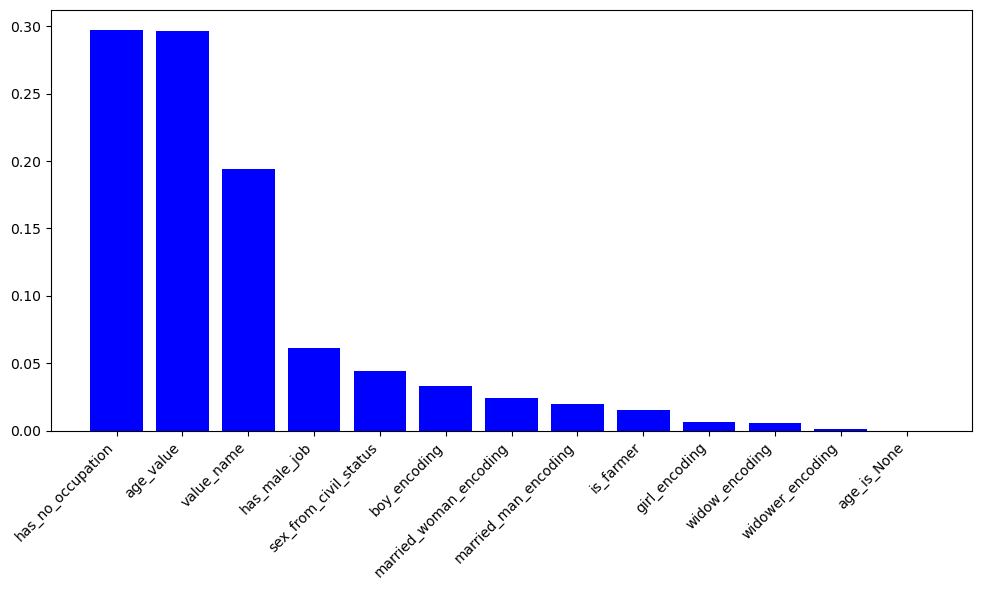

In [91]:
importances = pipeline.named_steps['random_forest'].feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
#plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45, ha="right")
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()